In [11]:
from skimage import transform, img_as_float, io, color
from scipy.signal import convolve2d # Нужно для сверток
from matplotlib import pyplot as plt
from skimage import morphology # Модуль для работы с бинарными изображениями
import numpy as np

(1080, 1920, 3)


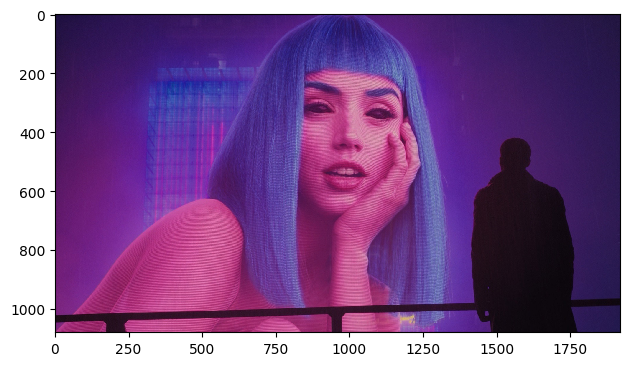

In [12]:
img = io.imread('look.jpg')

img_float = img/255

print(img_float.shape)
io.imshow(img_float)

img = io.imread('green_background/background_2.jpg'): В этой строке мы загружаем изображение из файла с именем 'green_background/background_2.jpg' с помощью функции io.imread() из модуля io библиотеки SciPy. Загруженное изображение сохраняется в переменной img.

img_float = img/255: В этой строке мы выполняем нормализацию изображения img путем деления каждого пикселя на 255. Это делается для приведения значений пикселей из диапазона от 0 до 255 в диапазон от 0 до 1. Результат нормализации сохраняется в переменной img_float.

print(img_float.shape): Эта строка выводит размерность (форму) массива img_float. Метод .shape возвращает кортеж, содержащий размерности массива. Например, если img_float представляет цветное изображение, то его форма будет (высота, ширина, количество каналов). Выводится на экран размерность img_float.

print(green_screen_img.shape): В этой строке выводится размерность (форма) массива green_screen_img. Однако, в предоставленном коде нет явной инициализации green_screen_img, поэтому эта строка вызовет ошибку. Если предположить, что green_screen_img должна быть другой переменной, то эта строка выводит размерность этой переменной.

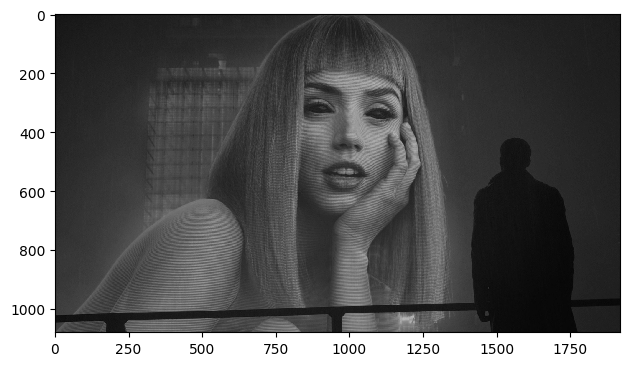

In [13]:
gray = color.rgb2gray(img)
io.imshow(gray)

In [14]:
# Создание ядра
kernel = np.ones([5, 5])
kernel /= kernel.sum()
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

В контексте обработки изображений, ядро (kernel) представляет собой маленький фильтр или матрицу, которая применяется к пикселям изображения для выполнения различных операций, таких как свертка или корреляция. Ядро является основным элементом в алгоритмах обработки изображений, таких как фильтрация, улучшение резкости, обнаружение границ и другие.

Форма ядра определяет его размерность и обычно является квадратной матрицей, но также может быть прямоугольной. Размер ядра зависит от задачи и требуемого эффекта. Например, для размытия изображения можно использовать ядро размером 3x3 или 5x5, а для обнаружения границ - ядро размером 3x3 или 7x7.

В процессе свертки или корреляции, ядро перемещается по пикселям изображения, и для каждой позиции применяется математическая операция между значениями пикселей и соответствующими элементами ядра. Результат этой операции становится значением выходного пикселя в новом изображении.

Различные операции обработки изображений могут использовать различные ядра. Некоторые распространенные типы ядер включают гауссово размытие, резкость, обнаружение границ (например, Собеля или Превитта), эмбоссирование и многие другие. Выбор правильного ядра зависит от задачи и требуемого визуального эффекта.

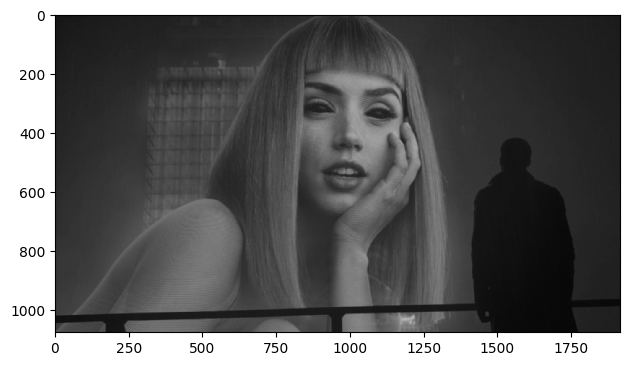

In [16]:
colvolved = convolve2d(gray, kernel,mode='valid')
colvolved = np.clip(colvolved, 0, 1)
io.imshow(colvolved)

colvolved = convolve2d(gray, kernel, mode='valid'): В этой строке мы выполняем свертку (convolution) двухмерного массива gray с использованием ядра (kernel). Функция convolve2d выполняет операцию свертки между массивом gray и ядром kernel. Режим 'valid' указывает на использование только "действительной" части результата свертки, то есть результат будет иметь размер, меньший, чем исходный массив, чтобы избежать свертки по краям. Результат свертки сохраняется в переменной colvolved.

colvolved = np.clip(colvolved, 0, 1): В этой строке мы используем функцию clip из модуля np (NumPy) для ограничения значений массива colvolved в диапазоне от 0 до 1. Функция clip заменяет все значения в массиве, которые меньше 0, на 0, и все значения, которые больше 1, на 1. Это позволяет нормализовать значения массива colvolved в пределах заданного диапазона.

io.imshow(colvolved): Здесь вызывается функция imshow из модуля io, чтобы отобразить массив colvolved в виде изображения на графическом устройстве (например, экране). Функция imshow автоматически интерпретирует значения в массиве colvolved как яркости пикселей изображения и отображает его соответствующим образом.

# Метод средних

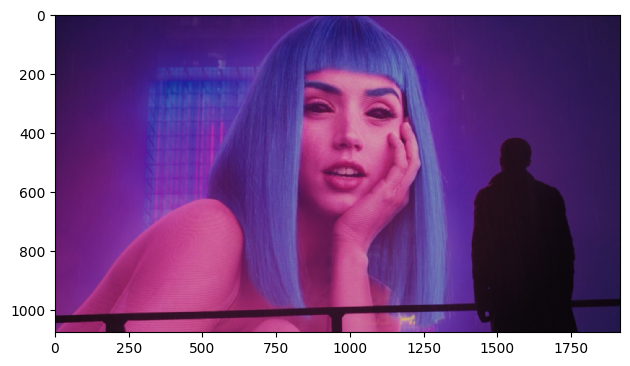

In [17]:
convolved_color = np.concatenate([
    convolve2d(img_float[..., i], kernel, mode='valid')[..., None] for i in range(3) 
], -1)
convolved_color = np.clip(convolved_color, 0, 1)
io.imshow(convolved_color)

convolve2d(img_float[..., i], kernel, mode='valid')[..., None] for i in range(3): В этой части используется генератор списка для выполнения операции свертки над каждым из каналов цветного изображения. img_float[..., i] извлекает i-й канал (0 для красного, 1 для зеленого и 2 для синего) из трехмерного массива img_float с использованием операции индексации ..., чтобы оставить остальные размерности нетронутыми. Затем, функция convolve2d выполняет свертку ядра kernel с выбранным каналом в режиме 'valid'. Результат имеет форму, меньшую, чем исходный канал изображения.

[..., None]: После выполнения свертки, к результату добавляется новая размерность, чтобы привести его к размеру исходного канала. Мы добавляем размерность с помощью [..., None], где None представляет новую размерность, добавленную в конце массива.

np.concatenate(..., -1): Функция np.concatenate используется для объединения результатов свертки, полученных для каждого канала, в один трехмерный массив. Аргумент -1 указывает на объединение по последней оси, т.е., объединение по размерности каналов.

convolved_color = np.clip(convolved_color, 0, 1): В этой строке мы используем функцию clip из модуля np (NumPy) для ограничения значений массива convolved_color в диапазоне от 0 до 1, аналогично тому, что было сделано ранее.

io.imshow(convolved_color): Здесь вызывается функция imshow из модуля io, чтобы отобразить массив convolved_color в виде изображения на графическом устройстве (например, экране). Функция imshow автоматически интерпретирует значения в массиве convolved_color как цветовые значения пикселей изображения и отображает его соответствующим образом.

# Метод Гаусса


C:\Users\Victor\AppData\Local\Temp\ipykernel_21780\1336898915.py:2: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  gaussian_filtered = filters.gaussian(img_float,sigma=9)


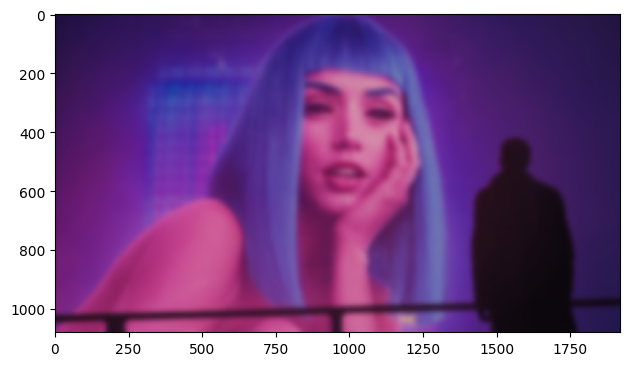

In [43]:
from skimage import filters
gaussian_filtered = filters.gaussian(img_float, sigma=9)
io.imshow(gaussian_filtered)

from skimage import filters: В этой строке мы импортируем модуль filters из библиотеки scikit-image (skimage). filters предоставляет функциональность для применения различных фильтров и операторов на изображениях.

gaussian_filtered = filters.gaussian(img_float, sigma=9): Здесь мы используем функцию gaussian из модуля filters, чтобы применить фильтр Гаусса к массиву img_float. Фильтр Гаусса используется для размытия изображения с использованием гауссовой функции. Аргумент img_float представляет собой входное изображение, к которому будет применен фильтр, а аргумент sigma указывает на стандартное отклонение гауссовой функции, которое определяет степень размытия. Чем больше значение sigma, тем сильнее размытие. Результат размытия сохраняется в переменной gaussian_filtered.

io.imshow(gaussian_filtered): Здесь вызывается функция imshow из модуля io, чтобы отобразить массив gaussian_filtered в виде изображения на графическом устройстве (например, экране). Функция imshow автоматически интерпретирует значения в массиве gaussian_filtered как яркости пикселей изображения и отображает его соответствующим образом.